## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
from scipy import stats

from statsmodels.formula.api import ols
import statsmodels.api as sm

/Users/Joe/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Preprocessing Data


In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [7]:
df = df.drop(['date'], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21143 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [9]:
#Fill Null Values
df['waterfront'] = df['waterfront'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['view'] = df['view'].fillna(0)
df['sqft_basement'] = df['sqft_basement'].fillna(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

/Users/Joe/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


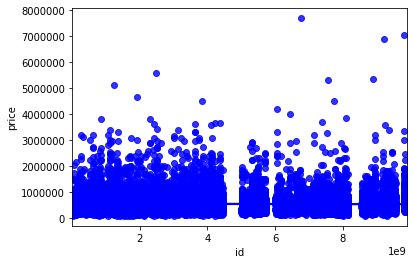

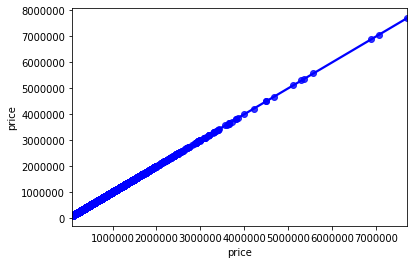

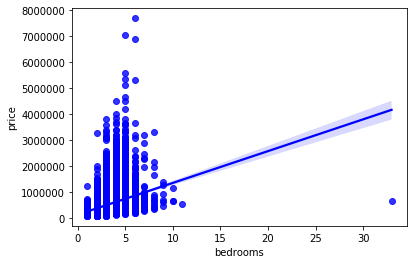

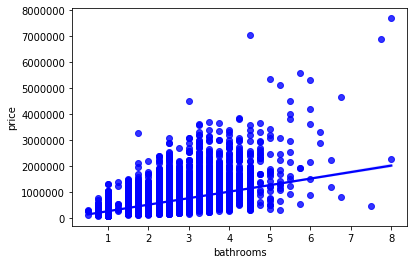

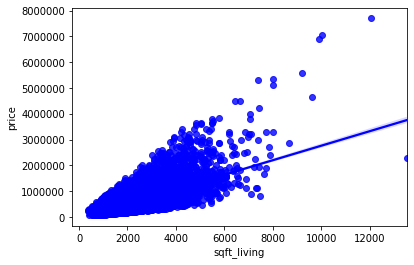

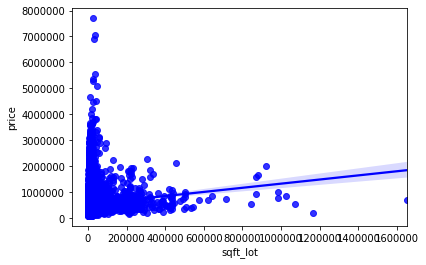

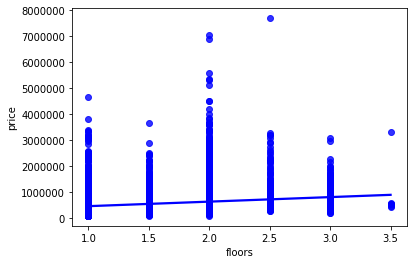

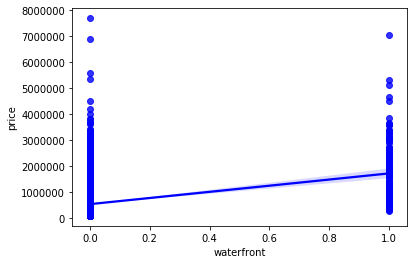

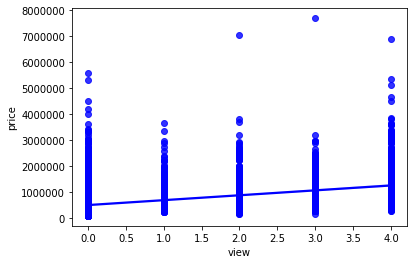

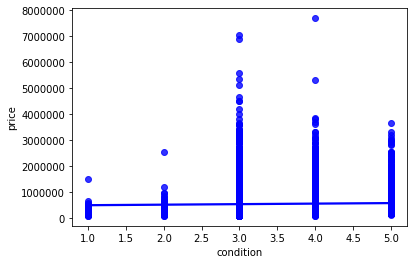

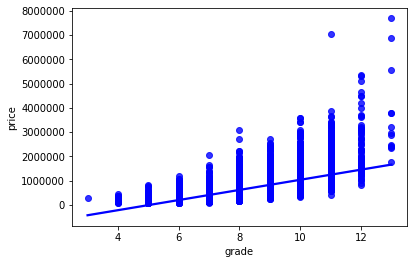

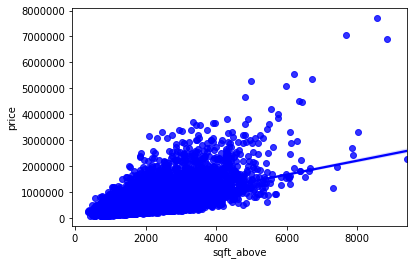

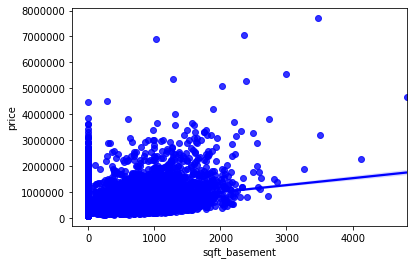

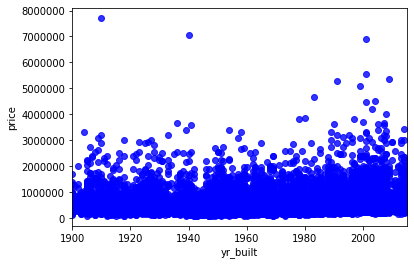

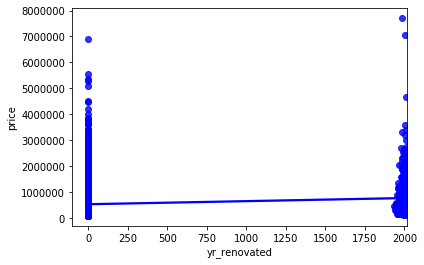

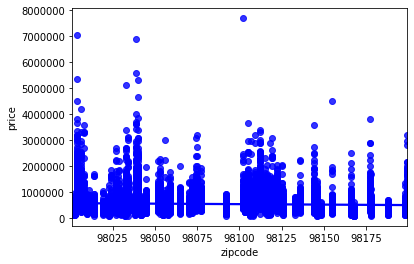

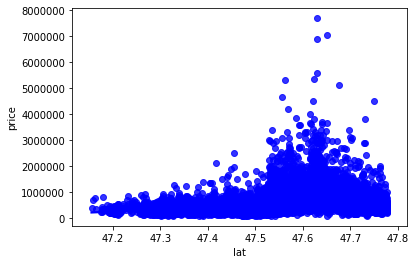

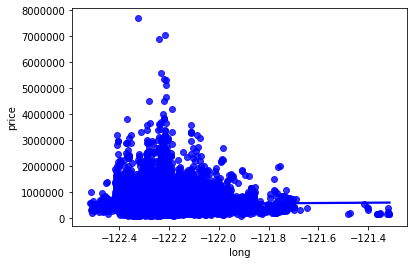

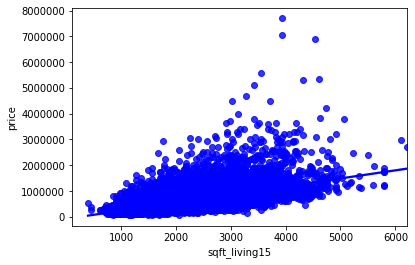

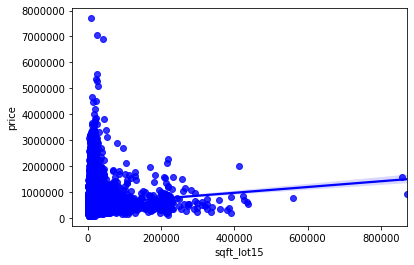

In [11]:
for cols in df.columns:
    plt.subplots(1, 1)
    sns.regplot(df[cols],df['price'],color='blue')

In [12]:
# Get rid of outliers, keep our data simple and bring to a more normalized data frame
df = df[df['price'] < 4000000]
df = df[df['bathrooms'] <= 4]
df = df[df['bedrooms'] < 10]
df = df[df['sqft_above'] <= 5000 ]
df = df[df['sqft_lot'] <= 25000]

#df = df[df['sqft_basement'] <= 1500]
#df.drop(df[df['sqft_basement'] < 1].index, inplace=True)



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19488 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19488 non-null  int64  
 1   price          19488 non-null  float64
 2   bedrooms       19488 non-null  int64  
 3   bathrooms      19488 non-null  float64
 4   sqft_living    19488 non-null  int64  
 5   sqft_lot       19488 non-null  int64  
 6   floors         19488 non-null  float64
 7   waterfront     19488 non-null  float64
 8   view           19488 non-null  float64
 9   condition      19488 non-null  int64  
 10  grade          19488 non-null  int64  
 11  sqft_above     19488 non-null  int64  
 12  sqft_basement  19488 non-null  float64
 13  yr_built       19488 non-null  int64  
 14  yr_renovated   19488 non-null  float64
 15  zipcode        19488 non-null  int64  
 16  lat            19488 non-null  float64
 17  long           19488 non-null  float64
 18  sqft_l

# Exploring coefficients and their correlation with target variable "price"

/Users/Joe/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


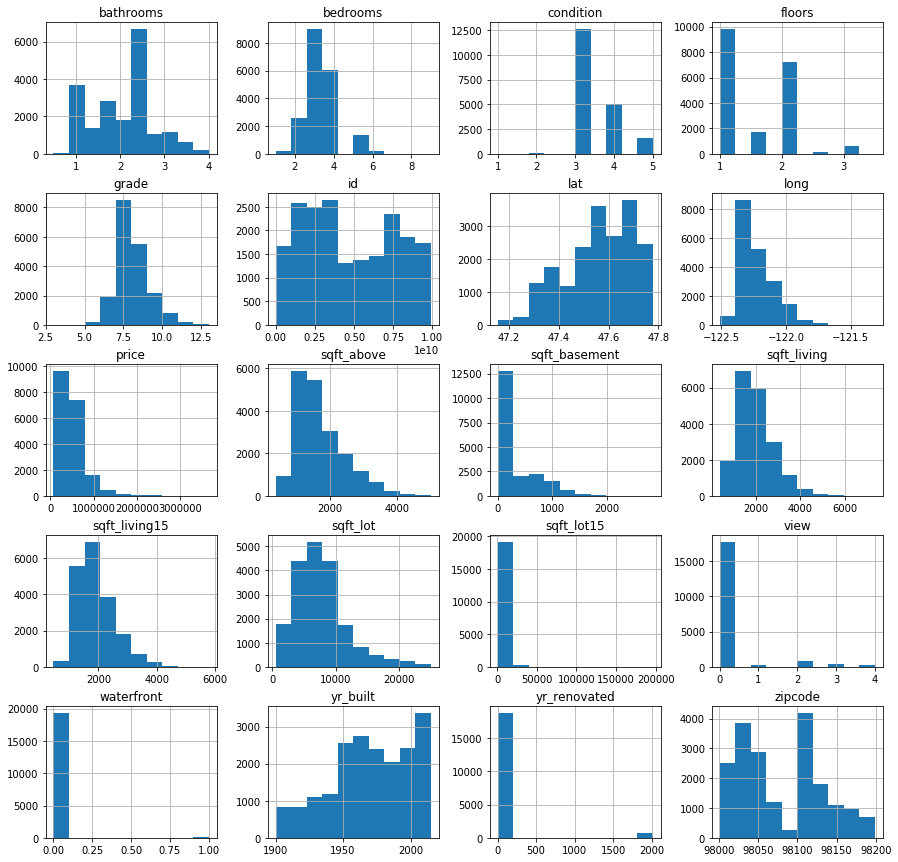

In [14]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax);

In [15]:
df[['condition', 'floors', 'bedrooms','view','waterfront','bathrooms','grade','yr_renovated']].nunique()

condition        5
floors           6
bedrooms         9
view             5
waterfront       2
bathrooms       15
grade           11
yr_renovated    69
dtype: int64

In [16]:
x = df.drop(columns=['price'], axis=1)
y = df['price']

correlation_to_price = []
for col in x.columns:
    correlation_to_price.append(round(stats.pearsonr(x[col],y)[0],2))

correlation_dict={}
for i, c in zip(x.columns,correlation_to_price):
    correlation_dict[i] = c

df_correlation = pd.DataFrame(sorted(correlation_dict.items(),key=lambda x:x[1],reverse=True),columns=['predictors','correlation'])


In [17]:
df_correlation

,predictors,correlation
0,sqft_living,0.66
1,grade,0.65
2,sqft_living15,0.58
3,sqft_above,0.55
4,bathrooms,0.46
5,view,0.39
6,lat,0.35
7,sqft_basement,0.31
8,bedrooms,0.30
9,floors,0.25


/Users/Joe/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


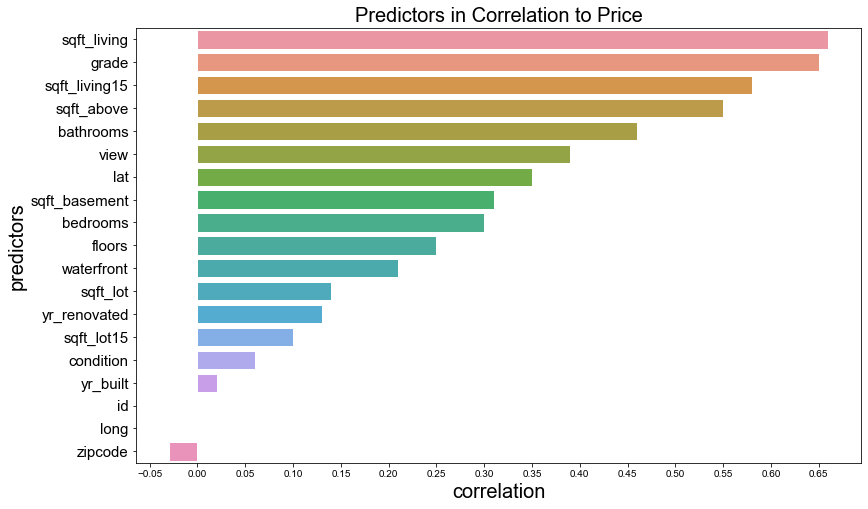

In [18]:
fig, ax = plt.subplots(figsize=(13,8))

plt.xticks(np.arange(-1,1,.05))
plt.yticks(size=15)

plt.title("Predictors in Correlation to Price", size=20)
plt.xlabel("Correlation", size=20)
plt.ylabel("Predictors", size =20)


sns.set_theme(font_scale=1)
sns.barplot(df_correlation['correlation'],df_correlation['predictors'])

In [19]:
df = df.drop(['id', 'zipcode'], axis = 1)

In [20]:
predictors = df.drop(['price'], axis =1)

In [21]:

predictors_int = sm.add_constant(predictors)
model = sm.OLS(df['price'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     2561.
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:38:03   Log-Likelihood:            -2.6271e+05
No. Observations:               19488   AIC:                         5.255e+05
Df Residuals:                   19470   BIC:                         5.256e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -3.14e+07    1.5e+06    -20.868      0.000   -3.44e+07   -2.85e+07
bedrooms       -2.57e+04   1856.740    -13.843      0.000   -2.93e+04   -2.21e+04
bathrooms       2.71e+04   3112.739      8.707      0.000     2.1e+04    3.32e+04
sqft_living      80.8764     17.481      4.627      0.000      46.612     115.141
sqft_lot         -1.9855      0.461     -4.303      0.000      -2.890      -1.081
floors         1.103e+04   3550.402      3.105      0.002    4066.069     1.8e+04
waterfront     4.964e+05   1.96e+04     25.344      0.000    4.58e+05    5.35e+05
view            4.83e+04   2017.482     23.941      0.000    4.43e+04    5.23e+04
condition      3.571e+04   2114.987     16.882      0.000    3.16e+04    3.99e+04
grade          1.031e+05   2016.645     51.131      0.000    9.92e+04    1.07e+05
sqft_above       57.8681     17.460      3.314      0.001      23.644      92.092
sqft_basement    38.3164     17.274      2.218      0.027       4.457      72.175
yr_built      -2376.5423     64.410    -36.897      0.000   -2502.791   -2250.294
yr_renovated     32.2096      3.669      8.779      0.000      25.018      39.401
lat            5.561e+05   9678.193     57.460      0.000    5.37e+05    5.75e+05
long          -7.272e+04   1.14e+04     -6.397      0.000    -9.5e+04   -5.04e+04
sqft_living15    55.1793      3.396     16.246      0.000      48.522      61.837
sqft_lot15       -0.5237      0.357     -1.468      0.142      -1.223       0.176
==============================================================================
Omnibus:                    11371.300   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           233041.896
Skew:                           2.405   Prob(JB):                         0.00
Kurtosis:                      19.244   Cond. No.                     1.57e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/Joe/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


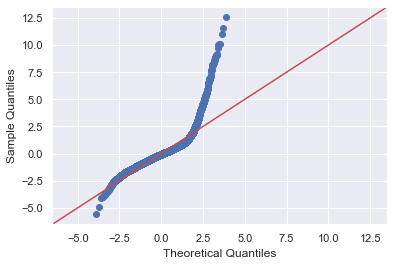

In [22]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

# Dealing with Categorical Values

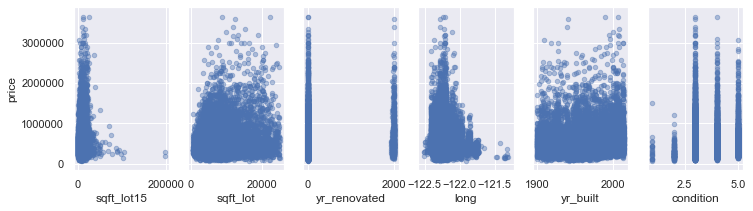

In [23]:
#View of the 6 least correlated
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(12,3), sharey=True)

for xcol, ax in zip([ 'sqft_lot15','sqft_lot', 'yr_renovated', 'long','yr_built','condition'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

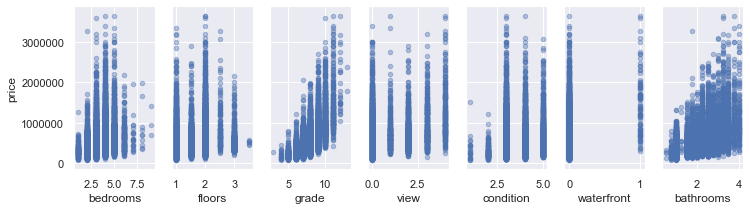

In [24]:
#view  of the categoricals
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(12,3), sharey=True)

for xcol, ax in zip([ 'bedrooms', 'floors', 'grade','view','condition','waterfront','bathrooms'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [25]:
bdrm = pd.get_dummies(df['bedrooms'], prefix='bdrms', drop_first=True)
bathrms = pd.get_dummies(df['bathrooms'], prefix='bathrms')
floors = pd.get_dummies(df['floors'], prefix='floor')
grade = pd.get_dummies(df['grade'], prefix='grade')
views = pd.get_dummies(df['view'],prefix='view')
condition = pd.get_dummies(df['condition'],prefix='condition')
waterfront = pd.get_dummies(df['waterfront'], prefix='waterfront')

In [26]:
waterfront

,waterfront_0.0,waterfront_1.0
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
21592,1,0
21593,1,0
21594,1,0
21595,1,0


In [27]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,47.5345,-122.069,1410,1287


In [28]:
#df = df.drop(['bedrooms','floors','grade','view','waterfront','condition','bathrooms'],axis=1)

In [29]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,47.5345,-122.069,1410,1287


In [30]:
categoricals = pd.concat([bdrm, bathrms, floors, grade, views, condition], axis=1)

In [31]:
categoricals

,bdrms_2,bdrms_3,bdrms_4,bdrms_5,bdrms_6,bdrms_7,bdrms_8,bdrms_9,bathrms_0.5,bathrms_0.75,...,view_0.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_1,condition_2,condition_3,condition_4,condition_5
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
21593,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
21594,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
21595,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


# Creating Log Transformations as well as Feature Scaling and Normalization for Non-Categorical Values

In [32]:
non_categorical = df[['sqft_living','sqft_living15','sqft_lot','sqft_above','yr_built','lat','sqft_basement','long', 'sqft_lot15','yr_renovated']].astype(int)




In [33]:
predictors_int = sm.add_constant(non_categorical)
model = sm.OLS(df['price'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     2300.
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:38:09   Log-Likelihood:            -2.6710e+05
No. Observations:               19488   AIC:                         5.342e+05
Df Residuals:                   19478   BIC:                         5.343e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     171.9136     21.562      7.973      0.000     129.651     214.176
sqft_living15   133.6626      3.948     33.854      0.000     125.924     141.402
sqft_lot         -7.8999      0.543    -14.538      0.000      -8.965      -6.835
sqft_above       45.9133     21.667      2.119      0.034       3.445      88.382
yr_built      -2394.9526     60.640    -39.494      0.000   -2513.813   -2276.092
lat           -9.842e+04   1.89e+04     -5.206      0.000   -1.35e+05   -6.14e+04
sqft_basement    35.2105     21.627      1.628      0.104      -7.179      77.601
long          -7.569e+04   7115.602    -10.638      0.000   -8.96e+04   -6.17e+04
sqft_lot15       -0.0847      0.445     -0.190      0.849      -0.956       0.787
yr_renovated     49.4116      4.474     11.043      0.000      40.641      58.182
==============================================================================
Omnibus:                     9643.295   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           129019.277
Skew:                           2.050   Prob(JB):                         0.00
Kurtosis:                      14.920   Cond. No.                     1.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/Joe/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


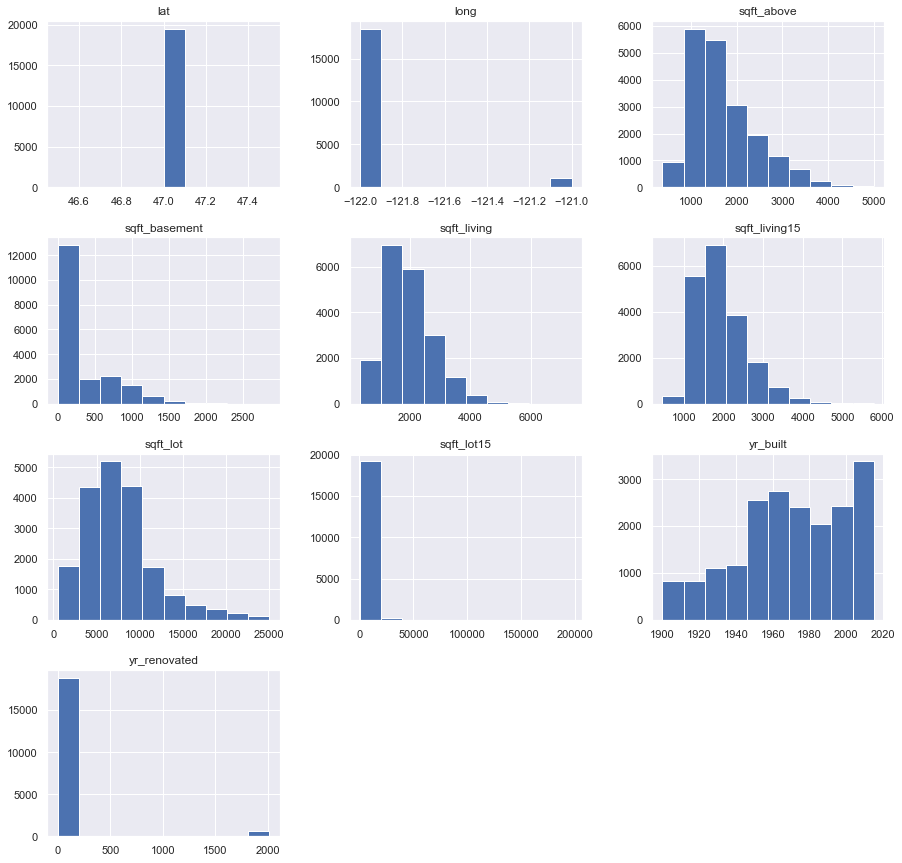

In [34]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
non_categorical.hist(ax = ax);

In [35]:
loglat = np.log(df['lat'])
long = df['long']
logsqft_living = np.log(df['sqft_living'])
logsqft_living15 = np.log(df['sqft_living15'])
logsqft_lot = np.log(df['sqft_lot'])
logsqft_lot15 = np.log(df['sqft_lot15'])
logsqft_above = np.log(df['sqft_above'])
logyr_built = np.log(df['yr_built'])
sqft_basement = (df['sqft_basement'])
yr_renovated = df['yr_renovated']

In [36]:
yr_renovated

0           0.0
1        1991.0
2           0.0
3           0.0
4           0.0
          ...  
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Length: 19488, dtype: float64

In [37]:

lognon_categorical = pd.concat([loglat, long, logsqft_living, logsqft_living15, logsqft_lot, logsqft_lot15, logsqft_above, logyr_built, sqft_basement, yr_renovated], axis=1)



In [38]:
lognon_categorical

,lat,long,sqft_living,sqft_living15,sqft_lot,sqft_lot15,sqft_above,yr_built,sqft_basement,yr_renovated
0,3.860965,-122.257,7.073270,7.200425,8.639411,8.639411,7.073270,7.578145,0.0,0.0
1,3.865372,-122.319,7.851661,7.432484,8.887653,8.941022,7.682482,7.576097,400.0,1991.0
2,3.865726,-122.233,6.646391,7.908387,9.210340,8.994917,6.646391,7.566828,0.0,0.0
3,3.861168,-122.393,7.580700,7.215240,8.517193,8.517193,6.956545,7.583248,910.0,0.0
4,3.863186,-122.045,7.426549,7.495542,8.997147,8.923058,7.426549,7.594381,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
21592,3.864917,-122.346,7.333023,7.333023,7.030857,7.319202,7.333023,7.605392,0.0,0.0
21593,3.860955,-122.362,7.745003,7.512071,8.667852,8.881836,7.745003,7.607878,0.0,0.0
21594,3.862715,-122.299,6.927558,6.927558,7.207860,7.604396,6.927558,7.605392,0.0,0.0
21595,3.861456,-122.069,7.377759,7.251345,7.778211,7.160069,7.377759,7.602900,0.0,0.0


/Users/Joe/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


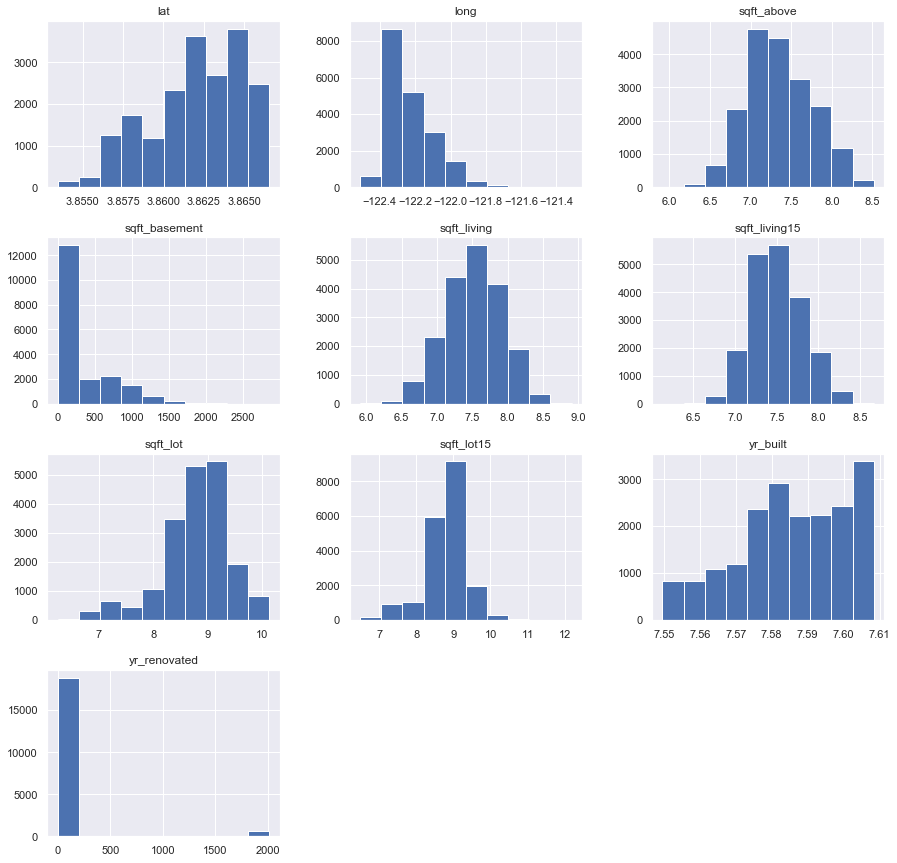

In [39]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
lognon_categorical.hist(ax = ax);

In [40]:
predictors_int = sm.add_constant(lognon_categorical)
model = sm.OLS(df['price'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     2484.
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:38:14   Log-Likelihood:            -2.6614e+05
No. Observations:               19488   AIC:                         5.323e+05
Df Residuals:                   19477   BIC:                         5.324e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.183e+08   3.09e+06    -38.217      0.000   -1.24e+08   -1.12e+08
lat            3.024e+07   5.42e+05     55.801      0.000    2.92e+07    3.13e+07
long          -1.856e+05   1.34e+04    -13.879      0.000   -2.12e+05   -1.59e+05
sqft_living    -3.29e+05   1.92e+04    -17.102      0.000   -3.67e+05   -2.91e+05
sqft_living15  2.787e+05   7431.021     37.511      0.000    2.64e+05    2.93e+05
sqft_lot       -4.68e+04   5656.216     -8.274      0.000   -5.79e+04   -3.57e+04
sqft_lot15     5669.9950   5936.872      0.955      0.340   -5966.784    1.73e+04
sqft_above     6.486e+05   1.74e+04     37.176      0.000    6.14e+05    6.83e+05
yr_built      -3.269e+06   1.27e+05    -25.786      0.000   -3.52e+06   -3.02e+06
sqft_basement   324.1185      9.810     33.039      0.000     304.890     343.347
yr_renovated     51.3223      4.270     12.018      0.000      42.952      59.692
==============================================================================
Omnibus:                    12413.581   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           274684.091
Skew:                           2.700   Prob(JB):                         0.00
Kurtosis:                      20.582   Cond. No.                     1.08e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# Min-Max Scaling:  This way of scaling brings all values between 0 and 1
def min_max(feature):
    x = (feature - min(feature)) / (max(feature) - min(feature))
    return x

# Standardization: Note that standardization does not make data  𝑚𝑜𝑟𝑒  normal, it will just change the mean and the standard error
def standardization(feature):
    x = (feature - np.mean(feature)) / np.sqrt(np.var(feature))
    return x

# Mean Normalization: The distribution will have values between -1 and 1, and a mean of 0
def normalization(feature):
    x = (feature - np.mean(feature)) / (max(feature) - min(feature))
    return x

In [42]:
# Min-Max Scaling
scaled_living = min_max(logsqft_living)
scaled_above = min_max(logsqft_above)

# Standardization
scaled_lat = standardization(loglat)
scaled_long = standardization(long)
scaled_yr_built = standardization(logyr_built)
scaled_basement = standardization(sqft_basement)

# Mean Normalization
scaled_living15 = normalization(logsqft_living15)
scaled_lot = normalization(logsqft_lot)
scaled_lot15 = normalization(logsqft_lot15)
scaled_yr_renovated = normalization(yr_renovated)


In [43]:
data_cont_scaled = pd.DataFrame([])
data_cont_scaled['sqft_living'] = scaled_living
data_cont_scaled['sqft_above'] = scaled_above
data_cont_scaled['lat'] = scaled_lat
data_cont_scaled['yr_built'] = scaled_yr_built
data_cont_scaled['sqft_basement'] = scaled_basement
data_cont_scaled['sqft_living15'] = scaled_living15
data_cont_scaled['sqft_lot'] = scaled_lot
data_cont_scaled['long'] = scaled_long
data_cont_scaled['sqft_lot15'] = scaled_lot15
data_cont_scaled['yr_renovated'] = scaled_yr_renovated

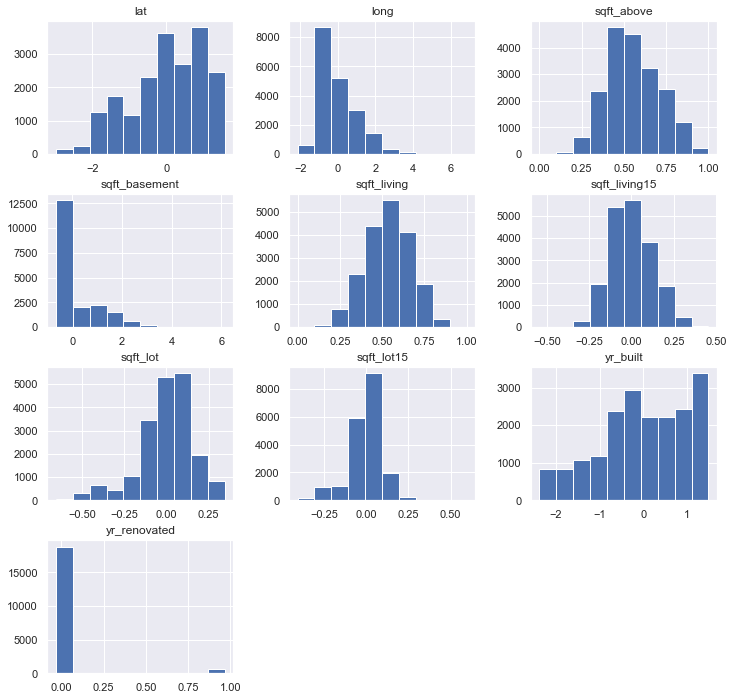

In [44]:
data_cont_scaled.hist(figsize = [12, 12]);

In [45]:
predictors_int = sm.add_constant(data_cont_scaled)
model = sm.OLS(df['price'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     2484.
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:38:17   Log-Likelihood:            -2.6614e+05
No. Observations:               19488   AIC:                         5.323e+05
Df Residuals:                   19477   BIC:                         5.324e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.049e+05    1.1e+04      9.557      0.000    8.33e+04    1.26e+05
sqft_living   -9.834e+05   5.75e+04    -17.102      0.000    -1.1e+06   -8.71e+05
sqft_above     1.689e+06   4.54e+04     37.176      0.000     1.6e+06    1.78e+06
lat            8.683e+04   1556.124     55.801      0.000    8.38e+04    8.99e+04
yr_built       -4.98e+04   1931.197    -25.786      0.000   -5.36e+04    -4.6e+04
sqft_basement  1.359e+05   4113.158     33.039      0.000    1.28e+05    1.44e+05
sqft_living15   7.06e+05   1.88e+04     37.511      0.000    6.69e+05    7.43e+05
sqft_lot      -1.813e+05   2.19e+04     -8.274      0.000   -2.24e+05   -1.38e+05
long          -2.468e+04   1778.245    -13.879      0.000   -2.82e+04   -2.12e+04
sqft_lot15     3.238e+04   3.39e+04      0.955      0.340   -3.41e+04    9.88e+04
yr_renovated   1.034e+05   8604.614     12.018      0.000    8.65e+04     1.2e+05
==============================================================================
Omnibus:                    12413.581   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           274684.091
Skew:                           2.700   Prob(JB):                         0.00
Kurtosis:                      20.582   Cond. No.                         63.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
data_cont_scaled.corr()

,sqft_living,sqft_above,lat,yr_built,sqft_basement,sqft_living15,sqft_lot,long,sqft_lot15,yr_renovated
sqft_living,1.000000,0.848856,0.027045,0.333548,0.420750,0.738504,0.272669,0.234196,0.239005,0.047071
sqft_above,0.848856,1.000000,-0.041643,0.446120,-0.082340,0.700463,0.239236,0.354361,0.209807,0.021268
lat,0.027045,-0.041643,1.000000,-0.169026,0.125020,0.026830,-0.157386,-0.153855,-0.151861,0.033824
yr_built,0.333548,0.446120,-0.169026,1.000000,-0.150229,0.321990,-0.108747,0.417574,-0.076436,-0.198691
sqft_basement,0.420750,-0.082340,0.125020,-0.150229,1.000000,0.199080,0.126743,-0.169929,0.111510,0.065432
sqft_living15,0.738504,0.700463,0.026830,0.321990,0.199080,1.000000,0.317986,0.319570,0.324627,-0.005737
sqft_lot,0.272669,0.239236,-0.157386,-0.108747,0.126743,0.317986,1.000000,0.262500,0.900057,0.015639
long,0.234196,0.354361,-0.153855,0.417574,-0.169929,0.319570,0.262500,1.000000,0.257686,-0.067934
sqft_lot15,0.239005,0.209807,-0.151861,-0.076436,0.111510,0.324627,0.900057,0.257686,1.000000,0.022594
yr_renovated,0.047071,0.021268,0.033824,-0.198691,0.065432,-0.005737,0.015639,-0.067934,0.022594,1.000000


In [47]:
abs(data_cont_scaled.corr()) > 0.75

,sqft_living,sqft_above,lat,yr_built,sqft_basement,sqft_living15,sqft_lot,long,sqft_lot15,yr_renovated
sqft_living,True,True,False,False,False,False,False,False,False,False
sqft_above,True,True,False,False,False,False,False,False,False,False
lat,False,False,True,False,False,False,False,False,False,False
yr_built,False,False,False,True,False,False,False,False,False,False
sqft_basement,False,False,False,False,True,False,False,False,False,False
sqft_living15,False,False,False,False,False,True,False,False,False,False
sqft_lot,False,False,False,False,False,False,True,False,True,False
long,False,False,False,False,False,False,False,True,False,False
sqft_lot15,False,False,False,False,False,False,True,False,True,False
yr_renovated,False,False,False,False,False,False,False,False,False,True


In [48]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_scaled_corr=data_cont_scaled.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_scaled_corr['pairs'] = list(zip(df_scaled_corr.level_0, df_scaled_corr.level_1))

# set index to pairs
df_scaled_corr.set_index(['pairs'], inplace = True)

#d rop level columns
df_scaled_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_scaled_corr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_scaled_corr.drop_duplicates(inplace=True)

In [49]:
df_scaled_corr[(df_scaled_corr.cc>.75) & (df_scaled_corr.cc <1)]

,cc
pairs,
"(sqft_lot15, sqft_lot)",0.900057
"(sqft_above, sqft_living)",0.848856


/Users/Joe/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


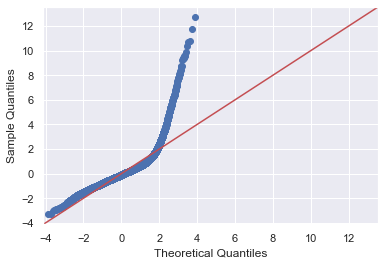

In [50]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

# Combining Dummy Variables and Scaled Data

In [51]:
fin_data = pd.concat([df['price'], data_cont_scaled, categoricals], axis=1)

In [52]:
fin_data

,price,sqft_living,sqft_above,lat,yr_built,sqft_basement,sqft_living15,sqft_lot,long,sqft_lot15,...,view_0.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_1,condition_2,condition_3,condition_4,condition_5
0,221900.0,0.388018,0.445432,-0.371002,-0.498484,-0.661202,-0.122338,-0.038019,-0.228545,-0.026478,...,1,0,0,0,0,0,0,1,0,0
1,538000.0,0.648441,0.679412,1.163424,-0.632955,0.292827,-0.030712,0.026080,-0.694775,0.026340,...,1,0,0,0,0,0,0,1,0,0
2,180000.0,0.245199,0.281480,1.286733,-1.241504,-0.661202,0.157195,0.109401,-0.048069,0.035778,...,1,0,0,0,0,0,0,1,0,0
3,604000.0,0.557786,0.400602,-0.300642,-0.163507,1.509213,-0.116489,-0.069577,-1.251244,-0.047881,...,1,0,0,0,0,0,0,0,0,1
4,510000.0,0.506213,0.581116,0.402176,0.567480,-0.661202,-0.005814,0.054352,1.365661,0.023194,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,0.474922,0.545195,1.005029,1.290418,-0.661202,-0.069983,-0.453365,-0.897811,-0.257673,...,1,0,0,0,0,0,0,1,0,0
21593,400000.0,0.612756,0.703425,-0.374667,1.453618,-0.661202,0.000713,-0.030675,-1.018128,0.015975,...,1,0,0,0,0,0,0,1,0,0
21594,402101.0,0.339268,0.389468,0.238312,1.290418,-0.661202,-0.230078,-0.407661,-0.544379,-0.207730,...,1,0,0,0,0,0,0,1,0,0
21595,400000.0,0.489889,0.562377,-0.200258,1.126812,-0.661202,-0.102233,-0.260390,1.185185,-0.285541,...,1,0,0,0,0,0,0,1,0,0


In [53]:
X = fin_data.drop(['price'], axis=1)
y = fin_data['price']

In [54]:
predictors_int = sm.add_constant(X)
model = sm.OLS(y,predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     854.8
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:38:18   Log-Likelihood:            -2.6217e+05
No. Observations:               19488   AIC:                         5.245e+05
Df Residuals:                   19432   BIC:                         5.249e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.093e+05    1.7e+04     24.041      0.000    3.76e+05    4.43e+05
sqft_living    -2.87e+05    5.2e+04     -5.522      0.000   -3.89e+05   -1.85e+05
sqft_above     7.284e+05   4.08e+04     17.835      0.000    6.48e+05    8.08e+05
lat             7.59e+04   1310.739     57.906      0.000    7.33e+04    7.85e+04
yr_built      -6.058e+04   2120.003    -28.575      0.000   -6.47e+04   -5.64e+04
sqft_basement   5.87e+04   3619.252     16.219      0.000    5.16e+04    6.58e+04
sqft_living15  3.073e+05   1.67e+04     18.446      0.000    2.75e+05     3.4e+05
sqft_lot      -8.183e+04   1.88e+04     -4.357      0.000   -1.19e+05    -4.5e+04
long          -5952.8770   1499.872     -3.969      0.000   -8892.756   -3012.998
sqft_lot15    -1.078e+05    2.8e+04     -3.852      0.000   -1.63e+05   -5.29e+04
yr_renovated   8.404e+04   7268.197     11.562      0.000    6.98e+04    9.83e+04
bdrms_2        3419.4640   1.38e+04      0.249      0.804   -2.35e+04    3.04e+04
bdrms_3       -1.162e+04   1.39e+04     -0.836      0.403   -3.89e+04    1.56e+04
bdrms_4       -2.384e+04   1.43e+04     -1.668      0.095   -5.18e+04    4175.068
bdrms_5       -2.024e+04   1.51e+04     -1.344      0.179   -4.98e+04    9272.076
bdrms_6       -7.418e+04   1.87e+04     -3.961      0.000   -1.11e+05   -3.75e+04
bdrms_7       -1.463e+05   3.82e+04     -3.825      0.000   -2.21e+05   -7.13e+04
bdrms_8        5666.1174   5.55e+04      0.102      0.919   -1.03e+05    1.14e+05
bdrms_9       -1.504e+05    9.9e+04     -1.519      0.129   -3.44e+05    4.36e+04
bathrms_0.5   -6.612e+04   7.92e+04     -0.835      0.404   -2.21e+05    8.91e+04
bathrms_0.75  -1.631e+04   2.35e+04     -0.693      0.488   -6.24e+04    2.98e+04
bathrms_1.0   -2.341e+04   8281.662     -2.827      0.005   -3.96e+04   -7180.413
bathrms_1.25    1.18e+04   5.31e+04      0.222      0.824   -9.22e+04    1.16e+05
bathrms_1.5   -2.002e+04   8508.217     -2.353      0.019   -3.67e+04   -3346.041
bathrms_1.75  -1.636e+04   7958.133     -2.056      0.040    -3.2e+04    -760.186
bathrms_2.0   -1.405e+04   8205.093     -1.713      0.087   -3.01e+04    2029.842
bathrms_2.25   4299.0566   8103.633      0.531      0.596   -1.16e+04    2.02e+04
bathrms_2.5   -1.359e+04   7704.045     -1.764      0.078   -2.87e+04    1507.295
bathrms_2.75    877.4978   8768.369      0.100      0.920   -1.63e+04    1.81e+04
bathrms_3.0    2.769e+04   9555.104      2.898      0.004    8961.068    4.64e+04
bathrms_3.25   1.027e+05   1.04e+04      9.900      0.000    8.24e+04    1.23e+05
bathrms_3.5    5.121e+04      1e+04      5.111      0.000    3.16e+04    7.08e+04
bathrms_3.75   2.041e+05   1.61e+04     12.704      0.000    1.73e+05    2.36e+05
bathrms_4.0    1.765e+05   1.75e+04     10.061      0.000    1.42e+05    2.11e+05
floor_1.0      5.349e+04   1.15e+04      4.643   

/Users/Joe/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


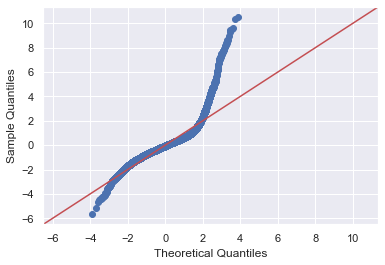

In [55]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [56]:
model_coefficients = pd.DataFrame(model.params[1:], columns=['coefficients'])

In [57]:
model_coefficients.sort_values(by='coefficients')


,coefficients
grade_5,-358811.429365
grade_6,-340447.120121
grade_4,-327601.503991
grade_7,-294974.218907
sqft_living,-286988.806241
grade_8,-224595.527090
bdrms_9,-150417.569815
bdrms_7,-146283.316141
grade_3,-139317.869965
sqft_lot15,-107794.405371


In [58]:
for i in range(len(model_coefficients)):
    print(model_coefficients.coefficients[i], '*', model_coefficients.index[i])

-286988.80624119774 * sqft_living
728433.0861549239 * sqft_above
75899.60524741415 * lat
-60579.16993024439 * yr_built
58700.832589816084 * sqft_basement
307269.6245412988 * sqft_living15
-81827.46930357278 * sqft_lot
-5952.877020583093 * long
-107794.40537078025 * sqft_lot15
84035.41418307507 * yr_renovated
3419.4639557981827 * bdrms_2
-11616.379564566907 * bdrms_3
-23835.07017749638 * bdrms_4
-20244.19210814117 * bdrms_5
-74179.55062844983 * bdrms_6
-146283.3161413843 * bdrms_7
5666.117442787392 * bdrms_8
-150417.5698149667 * bdrms_9
-66124.53365241937 * bathrms_0.5
-16310.251064027027 * bathrms_0.75
-23413.18351927332 * bathrms_1.0
11800.788407421496 * bathrms_1.25
-20022.87791340334 * bathrms_1.5
-16358.811472393012 * bathrms_1.75
-14052.846443180762 * bathrms_2.0
4299.056570116591 * bathrms_2.25
-13593.295454259322 * bathrms_2.5
877.497823652895 * bathrms_2.75
27689.894048849765 * bathrms_3.0
102705.44070007931 * bathrms_3.25
51211.83390025705 * bathrms_3.5
204095.5402886257 * bat